<a href="https://colab.research.google.com/github/Josh-techie/AI-TPs/blob/master/Reviewing/Revision_Examen_2024_(my_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Révision : Applied data science</h1></center>
<center><h3>Génie Informatique</h3></center>


---



## **Exercice I**

Le fichier produit.csv contient un ensemble de données catégorielles pour déterminer si un utilisateur a acheté un produit particulier. la dépendance de l'achat du produit est en fonctions du sexe, l'âge, le salaire estimé d'une personne.

créer un modèle de régression qui prédit si un utilisateur va acheter le produit.

In [60]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns
from datetime import datetime

produit_csv = pd.read_csv('produit.csv')

**Visualize the dataframe**

In [21]:
produit_csv.head()

,Purchased,Age,EstimatedSalary,Gender
0,0,19,19000,Male
1,0,35,20000,Male
2,0,26,43000,Female
3,0,27,57000,Female
4,0,19,76000,Male


In [22]:
produit_csv.tail()

,Purchased,Age,EstimatedSalary,Gender
395,1,46,41000,Female
396,1,51,23000,Male
397,1,50,20000,Female
398,0,36,33000,Male
399,1,49,36000,Female


In [10]:
produit_csv.describe()

,Purchased,Age,EstimatedSalary
count,400.000000,400.000000,400.000000
mean,0.357500,37.655000,69742.500000
std,0.479864,10.482877,34096.960282
min,0.000000,18.000000,15000.000000
25%,0.000000,29.750000,43000.000000
50%,0.000000,37.000000,70000.000000
75%,1.000000,46.000000,88000.000000
max,1.000000,60.000000,150000.000000


In [11]:
produit_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Purchased        400 non-null    int64 
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Gender           400 non-null    object
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


**Let's use a dataframe to store the csv file, to manipulate it!**

In [12]:
product_df = produit_csv

**See and visualize our df**

In [23]:
product_df

,Purchased,Age,EstimatedSalary,Gender
0,0,19,19000,Male
1,0,35,20000,Male
2,0,26,43000,Female
3,0,27,57000,Female
4,0,19,76000,Male
...,...,...,...,...
395,1,46,41000,Female
396,1,51,23000,Male
397,1,50,20000,Female
398,0,36,33000,Male


**Data Preprocessing (female, male) is gonna cause problems so let's convert to 1 and 0**

- Female -> 0
- Male -> 1

In [24]:
product_df['Gender'] = product_df['Gender'].map({'Female': 0, 'Male': 1})

**Check our dataframe, if it does need more cleaning :)**

In [25]:
product_df

,Purchased,Age,EstimatedSalary,Gender
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1
...,...,...,...,...
395,1,46,41000,0
396,1,51,23000,1
397,1,50,20000,0
398,0,36,33000,1


**Split the data into training and testing sets**

In [27]:
X = produit_csv[['Gender', 'Age', 'EstimatedSalary']]
y = produit_csv['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection**

In [28]:
model = LogisticRegression()

**Model Training**

In [29]:
model.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [30]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Testing the model**

In [33]:
predicted=model.predict(X_test)

# Result Visualization

In [34]:
prodiction_df = pd.DataFrame({'actual_close':y_test, 'Predicted_close':predicted})
prodiction_df.head(10)

,actual_close,Predicted_close
209,0,0
280,1,0
33,0,0
210,1,0
93,0,0
84,0,0
329,1,0
94,0,0
266,0,0
126,0,0


## **Exercice II**

All_stocks_5yr est un ensemble de données historiques de la bourse (5 dernières années) pour toutes les sociétés actuellement présentes sur l'indice S&P 500.

Analyser les données des actions Apple de 2013 à 2018 en mintrant l'evolution des actions en fonction du temps (utiliser la colonne "close").



In [36]:
stocks_csv = pd.read_csv('all_stocks_5yr.csv')

See our csv file and explore it 🐰

In [40]:
stocks_csv.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


**Filter Data for Apple**

In [45]:
apple_data = stocks_csv[stocks_csv['Name'] == 'AAPL']

**Convert 'date' column to datetime**

In [46]:
apple_data['date'] = pd.to_datetime(apple_data['date'])

<ipython-input-46-2f4987ffc085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['date'] = pd.to_datetime(apple_data['date'])


**creates a boolean mask that checks if the year extracted from the 'date' column is greater than or equal to 2013 and less than or equal to 2018**

In [56]:
apple_data = apple_data[(apple_data['date'].dt.year >= 2013) & (apple_data['date'].dt.year <= 2018)]
apple_data

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


**Visualize Stock Prices**

<Axes: xlabel='date', ylabel='close'>

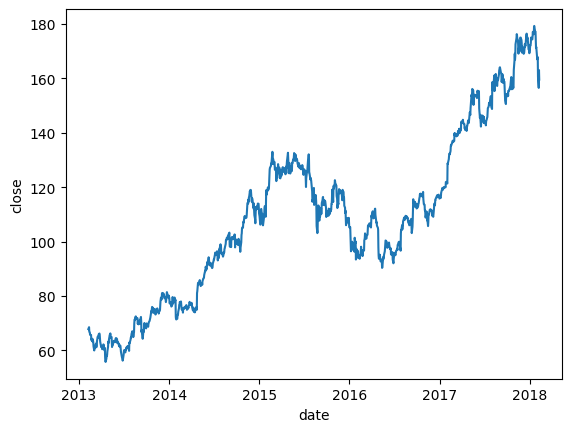

In [61]:
sns.lineplot(x=apple_data['date'],y=apple_data['close'])

# **Exercice III**

L'API [Open Notify](http://open-notify.org/Open-Notify-API/People-In-Space/)
 renvoie le nombre actuel de personnes dans l'espace. Lorsqu'il est connu, il renvoie également les noms et les vaisseaux spatial
 sur lesquels se trouvent ces personnes. Cette API ne prend aucune entrée.


1. Collecter les informations (Nom, vaisseau spatial) des personnes dans l'espace

In [63]:
import requests
import json

response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)

200


**Parse response in a json file**

In [50]:
perso_space = response.json()

**Process the Data**

In [51]:
number_of_people = perso_space['number']
people_in_space = perso_space['people']

2. Stockez ces informations dans un Dataframe (pandas).

In [52]:
space_df = pd.DataFrame(people_in_space)

**Display the data**

In [53]:
print("Number of people in space:", number_of_people)
print("\nPeople currently in space:")
print(space_df)

Number of people in space: 7

People currently in space:
                 name craft
0     Jasmin Moghbeli   ISS
1    Andreas Mogensen   ISS
2    Satoshi Furukawa   ISS
3  Konstantin Borisov   ISS
4      Oleg Kononenko   ISS
5        Nikolai Chub   ISS
6        Loral O'Hara   ISS


3. Enregitrez les Dataframes dans un fichier csv.

In [55]:
space_df.to_csv("people_in_space.csv")